In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

# set color cycle to gradient
# mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=plt.cm.viridis(np.linspace(0.2, 1, 12)))


In [118]:
# Load the dataset
columns = [
    'Family Name',
    'Variation',
    'Algorithm Name',
    'Year',
    'Looked at?',
    'Relevant?',
    'Parallel?',
    'Time Complexity Class',
    'Approximation Factor Class (Mult)',
    'Approximation Factor Class (Add)',
    'Approximation Type (additive/multiplicative)',
    'Parametrized Approximation?',
    'Type of PTAS (if PTAS)',
    'Parametrized Approximation?',
    'Quantum?',
]
approximation_algorithms = pd.read_csv(
    'approximation_algorithms.csv', usecols=columns)

# Clean and prepare the data
approximation_algorithms['Year'] = pd.to_numeric(
    approximation_algorithms['Year'].str.extract(r'(\d{4})')[0], errors='coerce')
approximation_algorithms.dropna(subset=['Year'], inplace=True)
approximation_algorithms['Year'] = approximation_algorithms['Year'].astype(int)

# Filter out irrelevant data
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != 0]
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != '0']

# # Filter out 0.001 looked at
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0.001']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0']

# # Filter out Parallel algorithms
approximation_algorithms = approximation_algorithms[approximation_algorithms['Parallel?'] != '1']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Parallel?'] != 1]
approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != 1]
approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != '1']


# if Type of PTAS (if PTAS) is  NaN and Parametrized Approximation? contains yes or yes?, then it is a "parameterized, non-PTAS" algorithm
approximation_algorithms.loc[approximation_algorithms['Type of PTAS (if PTAS)'].isna() & approximation_algorithms['Parametrized Approximation?'].str.contains(
    'yes', case=False, na=False), 'Type of PTAS (if PTAS)'] = 'parameterized, non-PTAS'

# if Type of PTAS (if PTAS) is  NaN and Parametrized Approximation? contains no or no?, then it is a "non-parameterized" algorithm
approximation_algorithms.loc[approximation_algorithms['Type of PTAS (if PTAS)'].isna() & approximation_algorithms['Parametrized Approximation?'].str.contains(
    'no', case=False, na=False), 'Type of PTAS (if PTAS)'] = 'non-parameterized'

# remove question mark from Type of PTAS (if PTAS)
approximation_algorithms['Type of PTAS (if PTAS)'] = approximation_algorithms['Type of PTAS (if PTAS)'].str.replace(
    '?', '')



# Sort rows
approximation_algorithms.sort_values(
    by=['Family Name', 'Variation', 'Year'], inplace=True)

approximation_algorithms

,Family Name,Looked at?,Relevant?,Variation,Algorithm Name,Year,Time Complexity Class,Approximation Factor Class (Mult),Approximation Factor Class (Add),Approximation Type (additive/multiplicative),Parametrized Approximation?,Type of PTAS (if PTAS),Parallel?,Quantum?
152,All-Pairs Shortest Paths (APSP),1,1,"APSP, unweighted, undirected, no FMM (Approxim...","Aingworth, Chekuri, Indyk, Motwani",1999,5.5,0,2.00,additive,no,non-parameterized,0,0.0
153,All-Pairs Shortest Paths (APSP),1,1,"APSP, unweighted, undirected, no FMM (Approxim...","Dor, Halperin, Zwick [APASP_2]",2000,5.33,0,2.00,additive,no,non-parameterized,0,0.0
154,All-Pairs Shortest Paths (APSP),1,1,"APSP, unweighted, undirected, no FMM (Approxim...","Dor, Halperin, Zwick [APASP_k]",2000,5.01,0,3.00,additive,yes,"parameterized, non-PTAS",0,0.0
155,All-Pairs Shortest Paths (APSP),1,1,"APSP, unweighted, undirected, no FMM (Approxim...","Dor, Halperin, Zwick [APASP_infty]",2000,5.01,4,0.00,multiplicative,no,non-parameterized,0,0.0
156,All-Pairs Shortest Paths (APSP),1,1,"APSP, unweighted, undirected, no FMM (Approxim...","Deng, Kirkpatrick, Rong, V. Williams, Zhong",2022,5.29,0,2.00,additive,no,non-parameterized,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,The Vertex Cover Problem,1,1,"The Vertex Cover Size Problem, Sparse (Approxi...","Biswas, Raman, Saurabh",2020,NaN,3,0.00,multiplicative,no,non-parameterized,0,0.0
737,The Vertex Cover Problem,1,1,"The Vertex Cover Size Problem, Sparse (Approxi...",Behnezhad [Theorem 1.3],2021,NaN,3,5.99,multiplicative-additive,yes,"parameterized, non-PTAS",0,0.0
878,Wiener Index,1,1,Minimum Wiener Connector problem,NaN,2008,5.5,2,0.00,multiplicative,yes,FPTAS,0,0.0
877,Wiener Index,1,1,Minimum Wiener Connector problem,Ruchansky,2015,5.01,4,0.00,multiplicative,no,non-parameterized,0,0.0


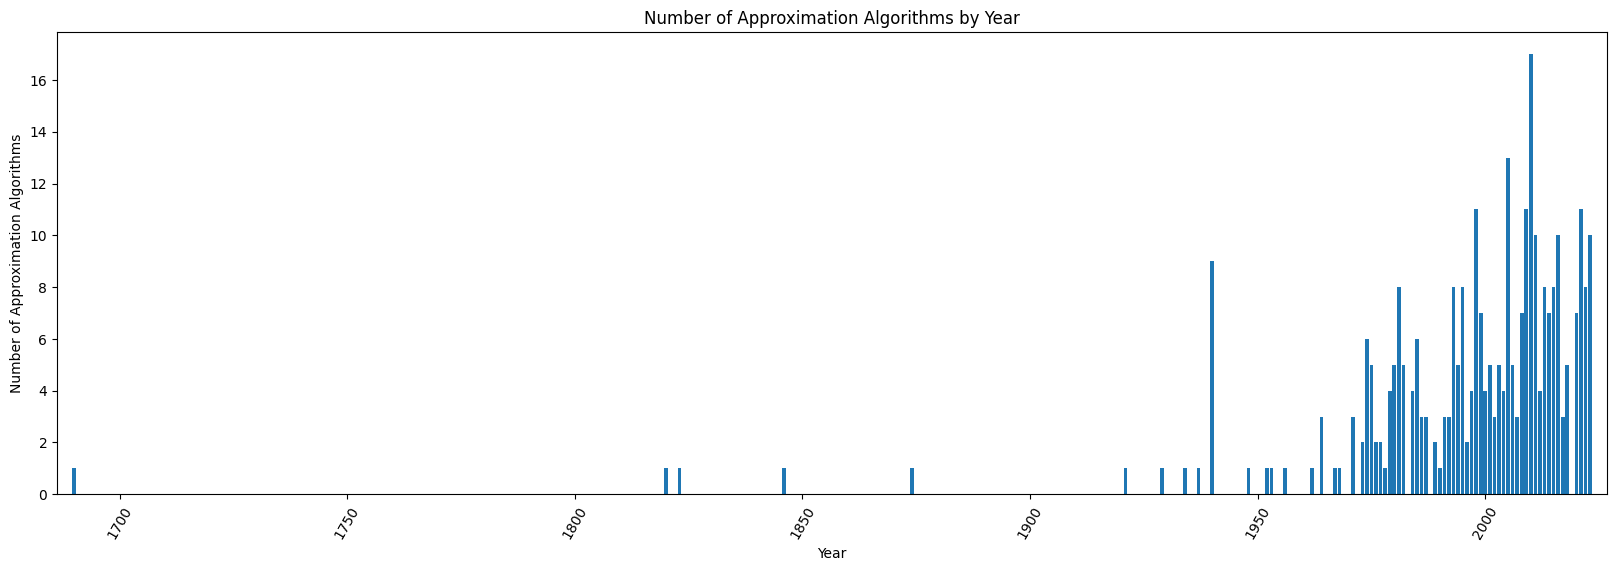

In [119]:
# Plot number of approximation algorithms by year
data = approximation_algorithms.copy()

data = data.groupby(['Year']).size()

fig, ax = plt.subplots()
bar_container = ax.bar(data.index, data.values)
# set figure size
fig.set_size_inches(20, 6)
plt.xticks(rotation=60)

plt.margins(x=0.01)



ax.set_xlabel('Year')
ax.set_ylabel('Number of Approximation Algorithms')
ax.set_title('Number of Approximation Algorithms by Year')
plt.show()

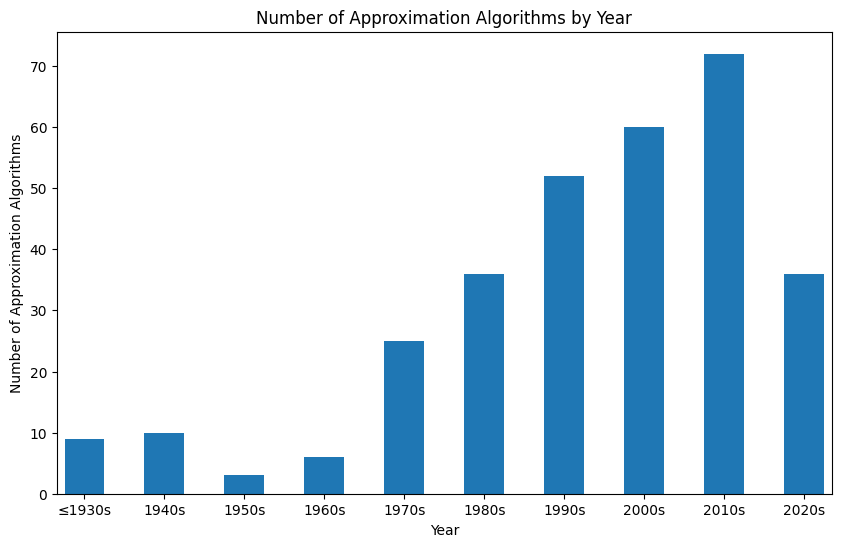

In [120]:
# Plot number of approximation algorithms by decade
data = approximation_algorithms.copy()

data = data.groupby(data['Year'] // 10 * 10).size()

# merge all year <= 1930 into 1930
data[1930] = data.loc[:1930].sum()
data = data.drop(data.loc[:1929].index)


fig, ax = plt.subplots()

bar_container = ax.bar(data.index, data.values, width=5)

# set figure size
fig.set_size_inches(10, 6)

plt.margins(x=0.01)



ax.set_xticks(data.index)
ax.set_xticklabels(['≤1930s'] + [str(year) + 's' for year in data.index[1:]])

ax.set_xlabel('Year')
ax.set_ylabel('Number of Approximation Algorithms')
ax.set_title('Number of Approximation Algorithms by Year')
plt.show()

309


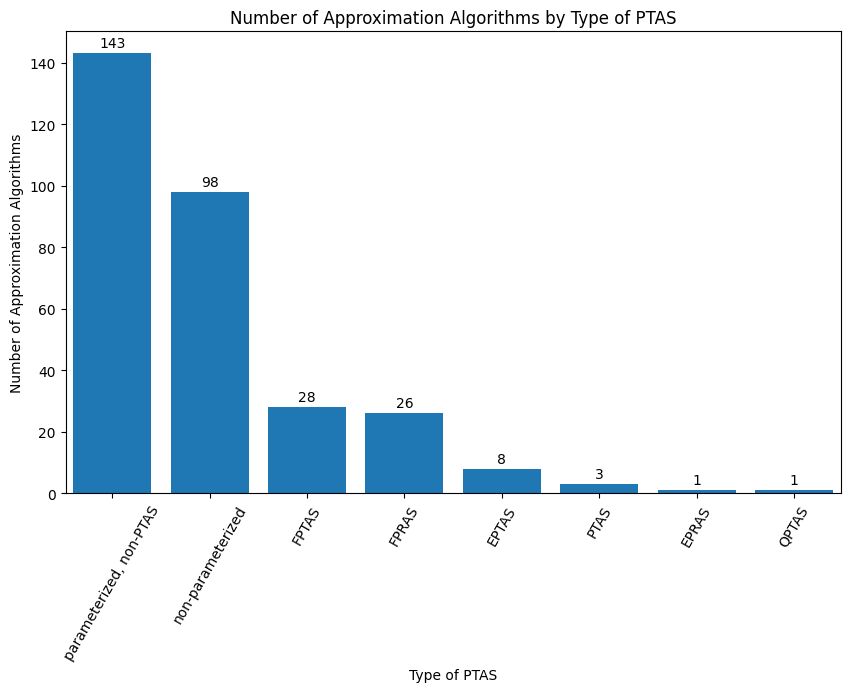

In [121]:
# Plot number of approximation algorithms by type of PTAS
data = approximation_algorithms.copy()
print(len(data))
# remove '?' from 'Type of PTAS (if PTAS)' column
data['Type of PTAS (if PTAS)'] = data['Type of PTAS (if PTAS)'].str.replace('?', '')

data = data.groupby(['Type of PTAS (if PTAS)']).size()

# sort bars by count
data = data.sort_values(ascending=False)


fig, ax = plt.subplots()
bar_container = ax.bar(data.index, data.values)
# set figure size
fig.set_size_inches(10, 6)
plt.xticks(rotation=60)

# add labels to bars
for i, v in enumerate(data.values):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')

plt.margins(x=0.01)






ax.set_xlabel('Type of PTAS')

ax.set_ylabel('Number of Approximation Algorithms')

ax.set_title('Number of Approximation Algorithms by Type of PTAS')

plt.show()

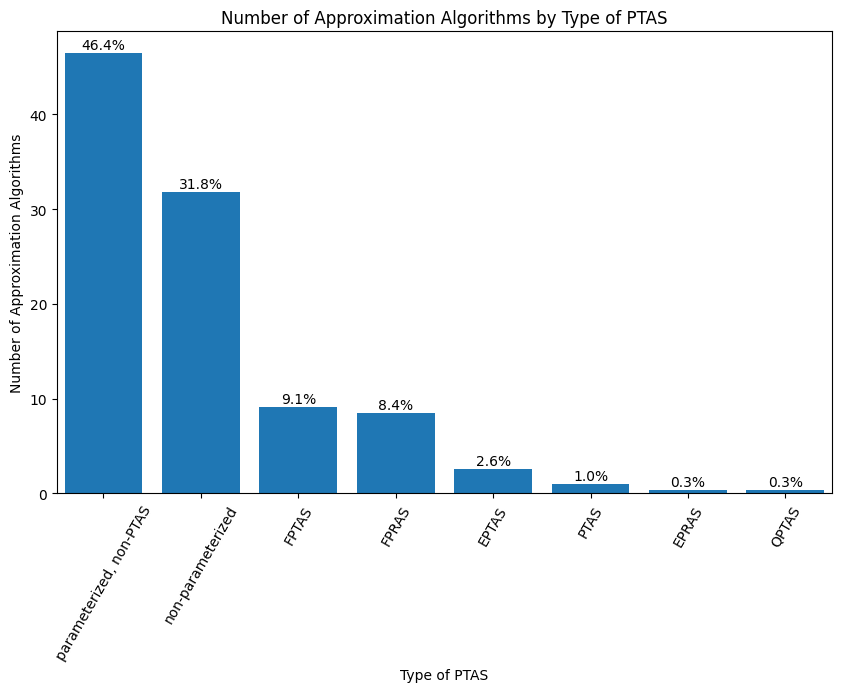

In [122]:
# Plot number of approximation algorithms by type of PTAS
data = approximation_algorithms.copy()

# remove '?' from 'Type of PTAS (if PTAS)' column
data['Type of PTAS (if PTAS)'] = data['Type of PTAS (if PTAS)'].str.replace('?', '')

data = data.groupby(['Type of PTAS (if PTAS)']).size()
data

# sort bars by count
data = data.sort_values(ascending=False)

# convert values to percentage
data = data / data.sum() * 100



fig, ax = plt.subplots()
bar_container = ax.bar(data.index, data.values)
# set figure size
fig.set_size_inches(10, 6)
plt.xticks(rotation=60)

plt.margins(x=0.01)
 
# add labels to bars with percentage and total count
for i, v in enumerate(data.values):
    ax.text(i, v + .1, str(round(v, 1)) + '%'
            , ha='center', va='bottom')





ax.set_xlabel('Type of PTAS')

ax.set_ylabel('Number of Approximation Algorithms')

ax.set_title('Number of Approximation Algorithms by Type of PTAS')

plt.show()

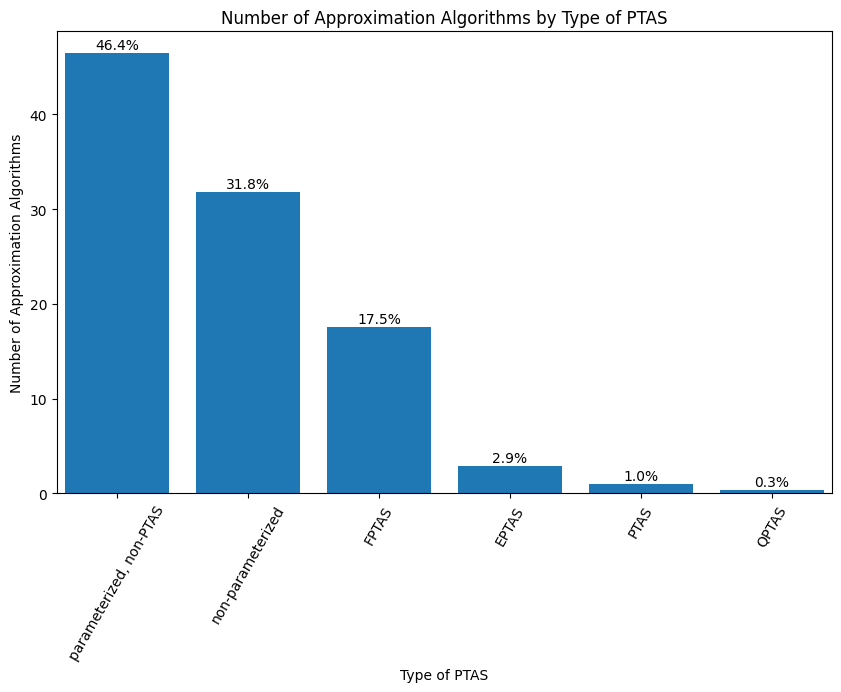

In [123]:
# Plot number of approximation algorithms by type of PTAS
data = approximation_algorithms.copy()

# remove '?' from 'Type of PTAS (if PTAS)' column
data['Type of PTAS (if PTAS)'] = data['Type of PTAS (if PTAS)'].str.replace('?', '')

data = data.groupby(['Type of PTAS (if PTAS)']).size()

# Merge "FPTAS" and "FPRAS" into "FPTAS"
data.loc['FPTAS'] = data.loc[['FPTAS', 'FPRAS']].sum()
data = data.drop(['FPRAS'])

# merge  "EPTAS" and "EPRAS" into "EPTAS"
data.loc['EPTAS'] = data.loc[['EPTAS', 'EPRAS']].sum()
data = data.drop(['EPRAS'])

# sort bars by count
data = data.sort_values(ascending=False)

# convert values to percentage
data = data / data.sum() * 100



fig, ax = plt.subplots()
bar_container = ax.bar(data.index, data.values)
# set figure size
fig.set_size_inches(10, 6)
plt.xticks(rotation=60)

plt.margins(x=0.01)
 
# add labels to bars with percentage and total count
for i, v in enumerate(data.values):
    ax.text(i, v + .1, str(round(v, 1)) + '%'
            , ha='center', va='bottom')





ax.set_xlabel('Type of PTAS')

ax.set_ylabel('Number of Approximation Algorithms')

ax.set_title('Number of Approximation Algorithms by Type of PTAS')

plt.show()

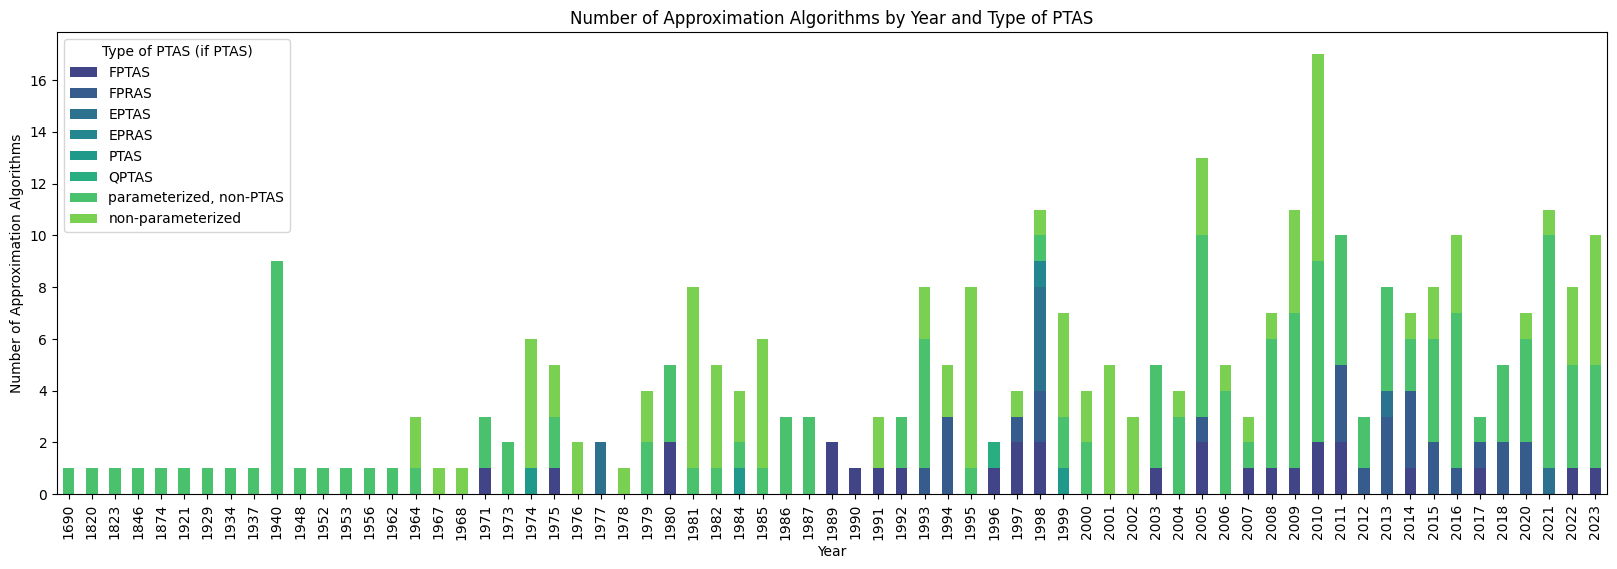

In [124]:
# Plot number of approximation algorithms by type of PTAS
data = approximation_algorithms.copy()

# remove '?' from 'Type of PTAS (if PTAS)' column
data['Type of PTAS (if PTAS)'] = data['Type of PTAS (if PTAS)'].str.replace('?', '')

data = data.groupby(['Year', 'Type of PTAS (if PTAS)']).size()

# sort like this 'FPTAS', 'FPRAS', 'EPTAS', 'EPRAS', 'PTAS', 'QPTAS', 'parameterized, non-PTAS', 'non-parameterized']
data = data.unstack().reindex(['FPTAS', 'FPRAS', 'EPTAS', 'EPRAS', 'PTAS', 'QPTAS', 'parameterized, non-PTAS', 'non-parameterized'], axis=1)









# plot type of PTAS by year
fig, ax = plt.subplots()
# data.plot(kind='bar', stacked=True, ax=ax)
# set figure size
fig.set_size_inches(20, 6)
plt.xticks(rotation=60)

# gradient colors
colors = plt.cm.viridis(np.linspace(0.2, 0.8, 8))

# plot stacked bar chart
bar_container = data.plot(kind='bar', stacked=True, ax=ax, color=colors)




plt.margins(x=0.01)



ax.set_xlabel('Year')
ax.set_ylabel('Number of Approximation Algorithms')
ax.set_title('Number of Approximation Algorithms by Year and Type of PTAS')
plt.show()



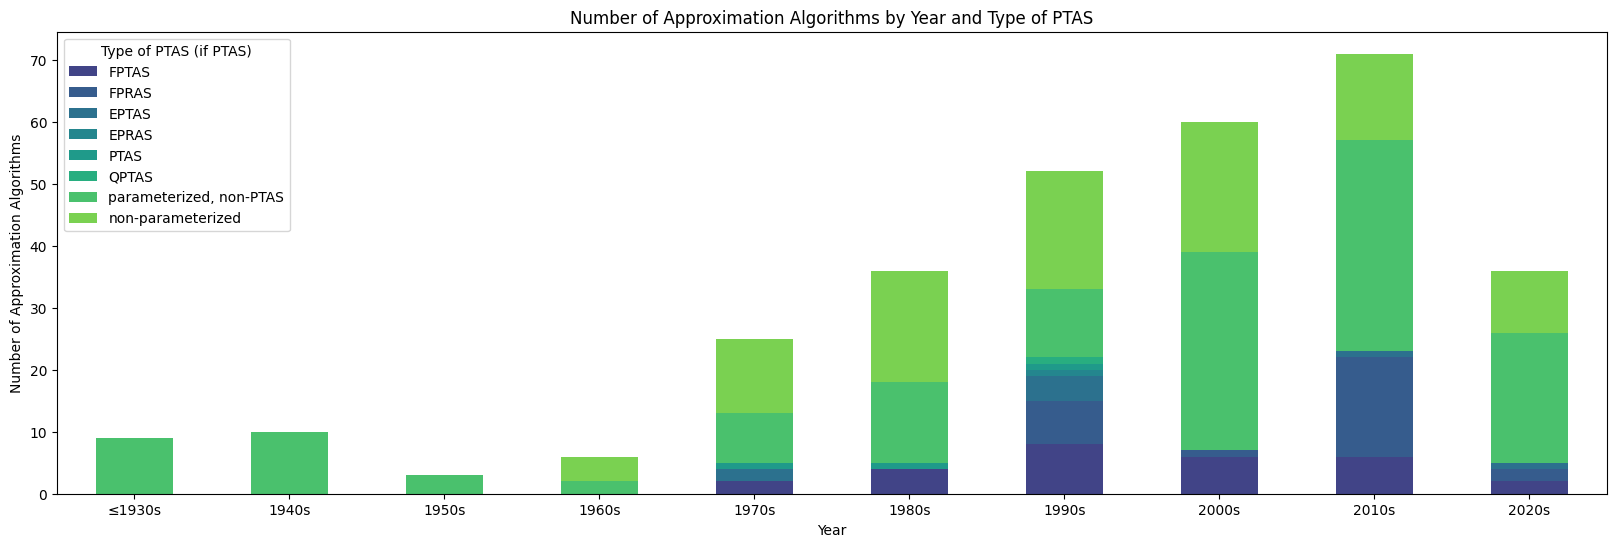

In [125]:
# Plot number of approximation algorithms by type of PTAS by decade
data = approximation_algorithms.copy()

# remove '?' from 'Type of PTAS (if PTAS)' column
data['Type of PTAS (if PTAS)'] = data['Type of PTAS (if PTAS)'].str.replace('?', '')

# merge all year <= 1930 into 1930
data['Year'] = data['Year'] // 10 * 10
data.loc[data['Year'] <= 1930, 'Year'] = 1930




data = data.groupby(['Year', 'Type of PTAS (if PTAS)']).size()

# sort like this 'FPTAS', 'FPRAS', 'EPTAS', 'EPRAS', 'PTAS', 'QPTAS', 'parameterized, non-PTAS', 'non-parameterized']
data = data.unstack().reindex(['FPTAS', 'FPRAS', 'EPTAS', 'EPRAS', 'PTAS', 'QPTAS', 'parameterized, non-PTAS', 'non-parameterized'], axis=1)


# plot type of PTAS by year
fig, ax = plt.subplots()
colors = plt.cm.viridis(np.linspace(0.2, 0.8, 8))

# plot stacked bar chart
bar_container = data.plot(kind='bar', stacked=True, ax=ax, color=colors)


# set figure size
fig.set_size_inches(20, 6)
plt.xticks(rotation=0)

plt.margins(x=0.01)

# first label to ≤1930s
plt.xticks(np.arange(0, len(data.index), 1), ['≤1930s'] + [str(year) + 's' for year in data.index[1:]])



ax.set_xlabel('Year')
ax.set_ylabel('Number of Approximation Algorithms')
ax.set_title('Number of Approximation Algorithms by Year and Type of PTAS')
plt.show()



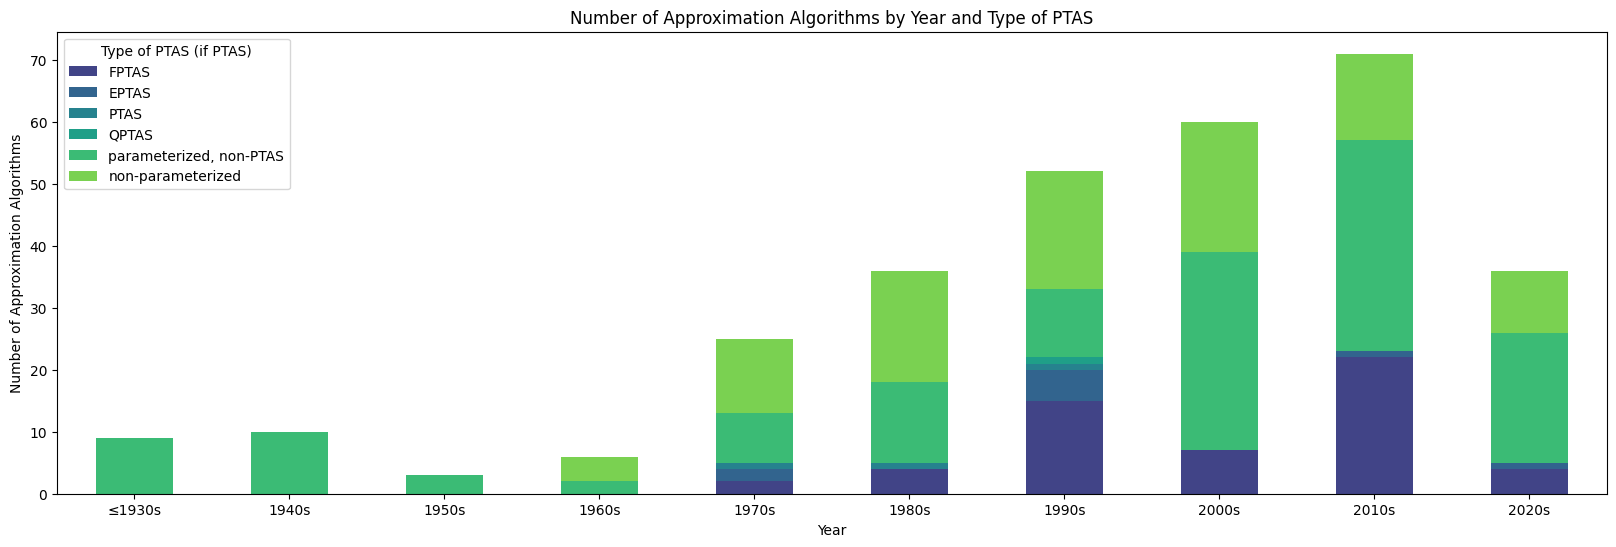

In [126]:
# Plot number of approximation algorithms by type of PTAS by decade
data = approximation_algorithms.copy()

# remove '?' from 'Type of PTAS (if PTAS)' column
data['Type of PTAS (if PTAS)'] = data['Type of PTAS (if PTAS)'].str.replace('?', '')

# merge all year <= 1930 into 1930
data['Year'] = data['Year'] // 10 * 10
data.loc[data['Year'] <= 1930, 'Year'] = 1930


# Merge "FPTAS" and "FPRAS" into "FPTAS"
data.loc[data['Type of PTAS (if PTAS)'].isin(['FPTAS', 'FPRAS']), 'Type of PTAS (if PTAS)'] = 'FPTAS'

# merge  "EPTAS" and "EPRAS" into "EPTAS"
data.loc[data['Type of PTAS (if PTAS)'].isin(['EPTAS', 'EPRAS']), 'Type of PTAS (if PTAS)'] = 'EPTAS'


data = data.groupby(['Year', 'Type of PTAS (if PTAS)']).size()

# sort like this 'FPTAS', 'FPRAS', 'EPTAS', 'EPRAS', 'PTAS', 'QPTAS', 'parameterized, non-PTAS', 'non-parameterized']
data = data.unstack().reindex(['FPTAS', 'EPTAS', 'PTAS', 'QPTAS', 'parameterized, non-PTAS', 'non-parameterized'], axis=1)



# plot type of PTAS by year
fig, ax = plt.subplots()

colors = plt.cm.viridis(np.linspace(0.2, 0.8, 6))

# plot stacked bar chart
bar_container = data.plot(kind='bar', stacked=True, ax=ax, color=colors)


# set figure size
fig.set_size_inches(20, 6)
plt.xticks(rotation=0)

plt.margins(x=0.01)

# first label to ≤1930s
plt.xticks(np.arange(0, len(data.index), 1), ['≤1930s'] + [str(year) + 's' for year in data.index[1:]])






ax.set_xlabel('Year')
ax.set_ylabel('Number of Approximation Algorithms')
ax.set_title('Number of Approximation Algorithms by Year and Type of PTAS')
plt.show()



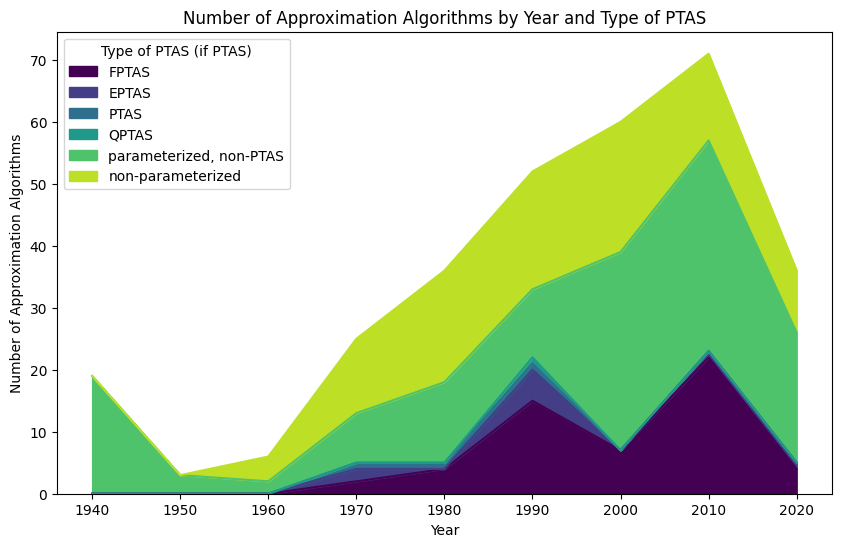

In [127]:
# Plot number of approximation algorithms by type of PTAS by decade
data = approximation_algorithms.copy()

# remove '?' from 'Type of PTAS (if PTAS)' column
data['Type of PTAS (if PTAS)'] = data['Type of PTAS (if PTAS)'].str.replace('?', '')

# merge all year <= 1940 into 1930
data['Year'] = data['Year'] // 10 * 10
data.loc[data['Year'] <= 1940, 'Year'] = 1940


# Merge "FPTAS" and "FPRAS" into "FPTAS"
data.loc[data['Type of PTAS (if PTAS)'].isin(['FPTAS', 'FPRAS']), 'Type of PTAS (if PTAS)'] = 'FPTAS'

# merge  "EPTAS" and "EPRAS" into "EPTAS"
data.loc[data['Type of PTAS (if PTAS)'].isin(['EPTAS', 'EPRAS']), 'Type of PTAS (if PTAS)'] = 'EPTAS'


data = data.groupby(['Year', 'Type of PTAS (if PTAS)']).size()

# sort like this 'FPTAS', 'FPRAS', 'EPTAS', 'EPRAS', 'PTAS', 'QPTAS', 'parameterized, non-PTAS', 'non-parameterized']
data = data.unstack().reindex(['FPTAS', 'EPTAS', 'PTAS', 'QPTAS', 'parameterized, non-PTAS', 'non-parameterized'], axis=1)



# plot type of PTAS by year
fig, ax = plt.subplots()

fig.set_size_inches(10, 6)

colors = plt.cm.viridis(np.linspace(0, 0.9, 6))

# plot stacked area chart
bar_container = data.plot(kind='area', stacked=True, ax=ax, color=colors)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Approximation Algorithms')
ax.set_title('Number of Approximation Algorithms by Year and Type of PTAS')
plt.show()



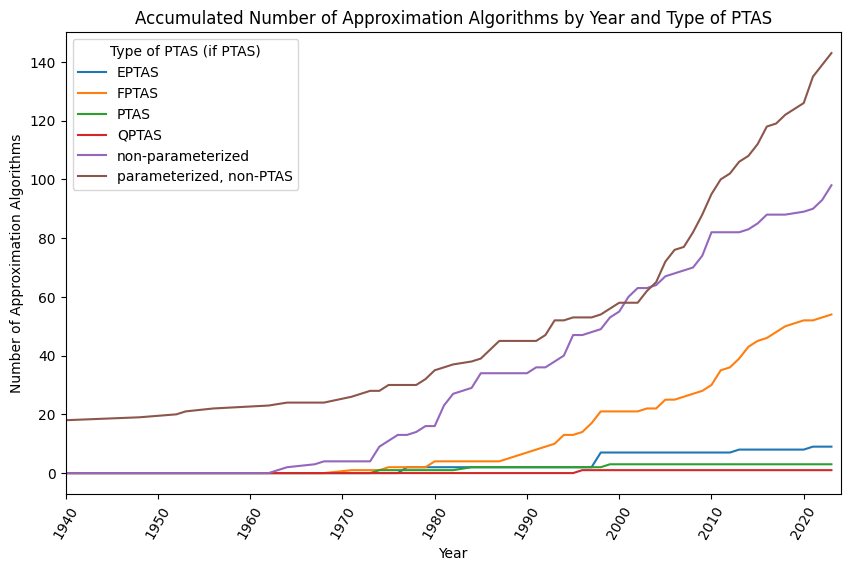

In [128]:
# Plot accumulated number of approximation algorithms by year
data = approximation_algorithms.copy()

# remove '?' from 'Type of PTAS (if PTAS)' column
data['Type of PTAS (if PTAS)'] = data['Type of PTAS (if PTAS)'].str.replace('?', '')

# Merge "FPTAS" and "FPRAS" into "FPTAS"
data.loc[data['Type of PTAS (if PTAS)'].isin(['FPTAS', 'FPRAS']), 'Type of PTAS (if PTAS)'] = 'FPTAS'

# merge  "EPTAS" and "EPRAS" into "EPTAS"
data.loc[data['Type of PTAS (if PTAS)'].isin(['EPTAS', 'EPRAS']), 'Type of PTAS (if PTAS)'] = 'EPTAS'

ptas_type_count_per_year = data.groupby(['Year', 'Type of PTAS (if PTAS)']).size().unstack(fill_value=0)

# accumulated number of each type of PTAS per year
ptas_type_count_per_year = ptas_type_count_per_year.cumsum()

fig, ax = plt.subplots()
ptas_type_count_per_year.plot(kind='line', ax=ax)
# set figure size
fig.set_size_inches(10, 6)
plt.xticks(rotation=60)
plt.xlim(1940, 2024)

plt.margins(x=0.01)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Approximation Algorithms')
ax.set_title('Accumulated Number of Approximation Algorithms by Year and Type of PTAS')
plt.show()





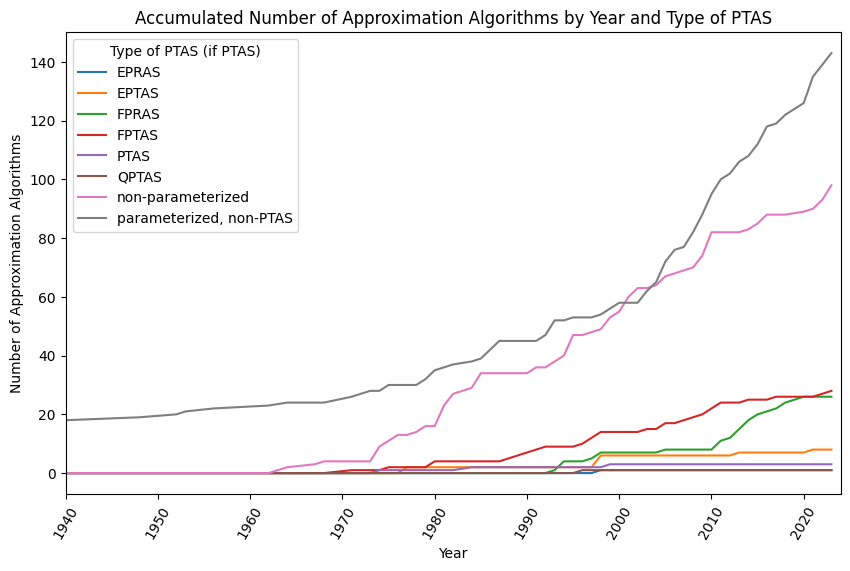

In [129]:
# Plot accumulated number of approximation algorithms by year
data = approximation_algorithms.copy()

# remove '?' from 'Type of PTAS (if PTAS)' column
data['Type of PTAS (if PTAS)'] = data['Type of PTAS (if PTAS)'].str.replace('?', '')

ptas_type_count_per_year = data.groupby(['Year', 'Type of PTAS (if PTAS)']).size().unstack(fill_value=0)

# accumulated number of each type of PTAS per year
ptas_type_count_per_year = ptas_type_count_per_year.cumsum()

fig, ax = plt.subplots()
ptas_type_count_per_year.plot(kind='line', ax=ax)
# set figure size
fig.set_size_inches(10, 6)
plt.xticks(rotation=60)
plt.xlim(1940, 2024)

plt.margins(x=0.01)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Approximation Algorithms')
ax.set_title('Accumulated Number of Approximation Algorithms by Year and Type of PTAS')
plt.show()


['non-parameterized' 'parameterized, non-PTAS' 'FPTAS' 'FPRAS' 'PTAS'
 'EPTAS' 'QPTAS' 'EPRAS']


/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3874/1154944834.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ylabels)


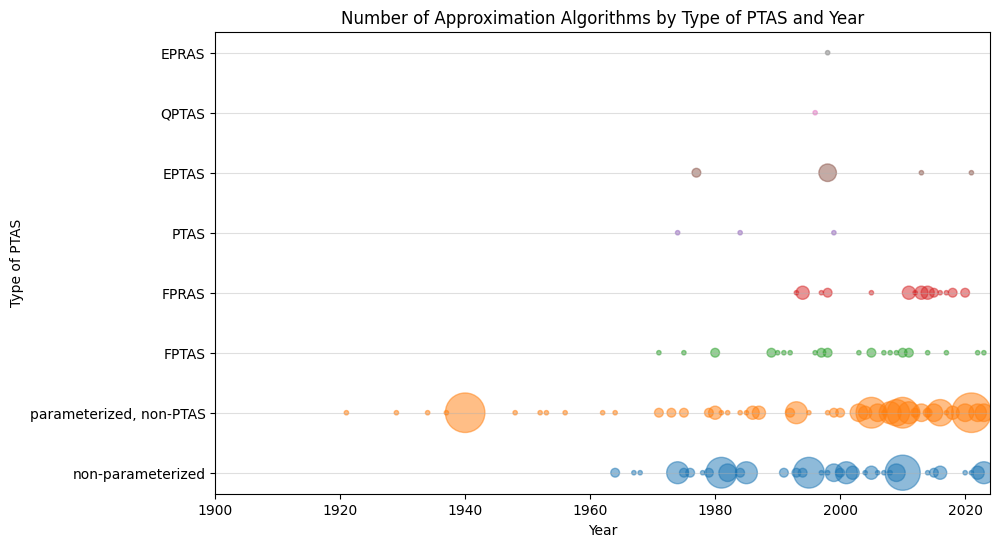

In [130]:
data = approximation_algorithms.copy()
types_of_ptas = data['Type of PTAS (if PTAS)'].dropna().unique()


print(types_of_ptas)

# count of each type of PTAS by year
data = data.groupby(['Year', 'Type of PTAS (if PTAS)']).size()
data = data.unstack(fill_value=0)
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10, 6)
ax.grid(axis='y', alpha=0.4)
ylabels = [""]
for i, ptas_type in enumerate(types_of_ptas):
    ylabels.append(ptas_type)

for i, ptas_type in enumerate(types_of_ptas):
    x = data.index
    y = np.full_like(x, i)
    s = data[ptas_type].values
    ax.scatter(x, y, s=10*s**2, alpha=0.5, label=ptas_type)

plt.xlim(1900, 2024)


ax.set_yticklabels(ylabels)
ax.set_xlabel('Year')
ax.set_ylabel('Type of PTAS')
ax.set_title('Number of Approximation Algorithms by Type of PTAS and Year')


# plt.legend(title='Type of PTAS')
plt.show()


